In [393]:

import pandas as pd 
import numpy as np

In [394]:
df_bond = pd.read_csv('/Users/katyasva/Downloads/DTB4WK.csv')
df_bond = df_bond.rename(columns={'observation_date': 'Date'})
df_bond = df_bond.rename(columns={'DTB4WK': 'Change_bond'})
df_bond['Date'] = pd.to_datetime(df_bond['Date'])


In [395]:
def load_data(filepath, suffix, columns=["Date", "Price", "Change %"]):

    df = pd.read_csv(filepath, usecols=columns)
    df["Date"] = pd.to_datetime(df["Date"])
    df['Change %'] = df['Change %'].astype(str).str.replace('%','').str.replace(',', '').astype(float)
    df = df.rename(columns={col: f"{col}_{suffix}" for col in columns if col != "Date"}
      
                   
    )

    return df

df_nvd = load_data("/Users/katyasva/Downloads/NVIDIA Stock Price History.csv", suffix="nvd")
df_sp500 = load_data       ('/Users/katyasva/Downloads/S&P 500 Historical Data.csv', suffix="sp_500")
df_alpha = load_data('/Users/katyasva/Downloads/Alphabet A Stock Price History.csv', suffix="alpha")
df_am =    load_data('/Users/katyasva/Downloads/Amazon.com Stock Price History.csv', suffix="am")
df_mic =   load_data ('/Users/katyasva/Downloads/Microsoft Stock Price History.csv', suffix="mic")
df_apple = load_data     ('/Users/katyasva/Downloads/Apple Stock Price History.csv', suffix="apple")





In [396]:
df_list = [df_am, df_alpha, df_mic, df_nvd, df_sp500, df_apple, df_bond]

for df in df_list:
    if 'Date' in df.columns:  
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df_merged = df_list[0]  

for df in df_list[1:]:  
    df_merged = pd.merge(df_merged, df, on="Date", how="outer")


df_merged = df_merged.sort_values(by="Date")

df_merged

,Date,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
0,2015-01-02,15.43,-0.58,26.48,-0.19,46.76,0.67,0.50,0.00,"2,058.20",-0.03,27.33,-0.94,0.02
1,2015-01-05,15.11,-2.07,25.97,-1.93,46.33,-0.92,0.49,-2.00,"2,020.60",-1.83,26.56,-2.82,0.02
2,2015-01-06,14.76,-2.32,25.33,-2.46,45.65,-1.47,0.48,-2.04,"2,002.60",-0.89,26.57,0.04,0.02
3,2015-01-07,14.92,1.08,25.26,-0.28,46.23,1.27,0.48,0.00,"2,025.90",1.16,26.94,1.39,0.02
4,2015-01-08,15.02,0.67,25.35,0.36,47.59,2.94,0.50,4.17,"2,062.10",1.79,27.97,3.82,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,2025-01-27,235.42,0.24,191.81,-4.20,434.56,-2.14,118.42,-16.97,"6,012.28",-1.46,229.86,3.18,4.26
2628,2025-01-28,238.15,1.16,195.30,1.82,447.20,2.91,128.99,8.93,"6,067.70",0.92,238.26,3.65,4.27
2629,2025-01-29,237.07,-0.45,195.41,0.06,442.33,-1.09,123.70,-4.10,"6,039.31",-0.47,239.36,0.46,4.26
2630,2025-01-30,234.64,-1.03,200.87,2.79,414.99,-6.18,124.65,0.77,"6,071.17",0.53,237.59,-0.74,4.25


In [397]:
df_merged['Price_sp_500'] = df_merged['Price_sp_500'].replace(',', '', regex=True).astype(float)

In [398]:
df_merged.isna().sum()

Date                 0
Price_am            96
Change %_am         96
Price_alpha         95
Change %_alpha      95
Price_mic           95
Change %_mic        95
Price_nvd           95
Change %_nvd        95
Price_sp_500        96
Change %_sp_500     96
Price_apple         95
Change %_apple      95
Change_bond        111
dtype: int64

In [399]:
df_merged_cleaned = df_merged.dropna()

In [200]:
df_merged_cleaned.to_csv("/Users/katyasva/Downloads/Merged_raw_data_cleaned.csv", index=False)

In [201]:
df_merged_cleaned

,Date,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
0,2015-01-02,15.43,-0.58,26.48,-0.19,46.76,0.67,0.50,0.00,2058.20,-0.03,27.33,-0.94,0.02
1,2015-01-05,15.11,-2.07,25.97,-1.93,46.33,-0.92,0.49,-2.00,2020.60,-1.83,26.56,-2.82,0.02
2,2015-01-06,14.76,-2.32,25.33,-2.46,45.65,-1.47,0.48,-2.04,2002.60,-0.89,26.57,0.04,0.02
3,2015-01-07,14.92,1.08,25.26,-0.28,46.23,1.27,0.48,0.00,2025.90,1.16,26.94,1.39,0.02
4,2015-01-08,15.02,0.67,25.35,0.36,47.59,2.94,0.50,4.17,2062.10,1.79,27.97,3.82,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2025-01-24,234.85,-0.24,200.21,1.13,444.06,-0.59,142.62,-3.12,6101.24,-0.29,222.78,-0.39,4.26
2627,2025-01-27,235.42,0.24,191.81,-4.20,434.56,-2.14,118.42,-16.97,6012.28,-1.46,229.86,3.18,4.26
2628,2025-01-28,238.15,1.16,195.30,1.82,447.20,2.91,128.99,8.93,6067.70,0.92,238.26,3.65,4.27
2629,2025-01-29,237.07,-0.45,195.41,0.06,442.33,-1.09,123.70,-4.10,6039.31,-0.47,239.36,0.46,4.26


In [400]:
df_merged_cleaned.set_index("Date", inplace=True)

In [337]:
min_value = min(df_merged_cleaned['Change %_nvd'])
df_merged_cleaned[df_merged_cleaned['Change %_nvd'] == min_value]


,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
Date,,,,,,,,,,,,,
2016-02-29,27.63,-0.47,35.86,-95.05,50.88,-0.88,0.78,-97.54,1932.2,-0.81,24.17,-75.07,0.22


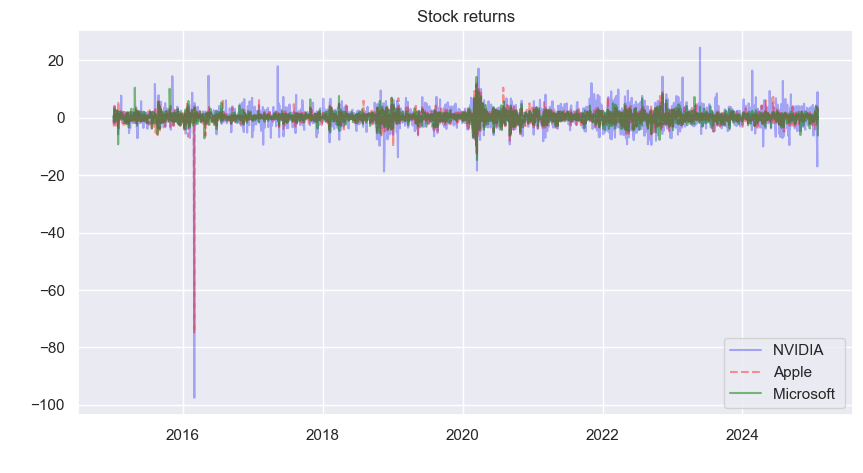

In [357]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))


plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change %_nvd'], 
         label="NVIDIA ", color='blue', linestyle='solid', alpha = 0.3)


plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change %_apple'], 
         label="Apple ", color='red', linestyle='dashed', alpha = 0.4)

plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change %_mic'], 
         label="Microsoft ", color='green', linestyle='solid', alpha = 0.5)




plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Stock returns")
plt.legend()
plt.grid(True)




In [ ]:
# checking if the merge happened ok
row = df_apple[df_apple['Date'] == '2015-01-02']
row

,Date,Price,Open,High,Low,Vol.,Change %,Change
2536,2015-01-02,27.33,27.85,27.86,26.84,212.82M,-0.94%,-0.94


In [401]:
df_merged_cleaned = df_merged_cleaned[df_merged_cleaned['Change %_nvd'] != min_value]


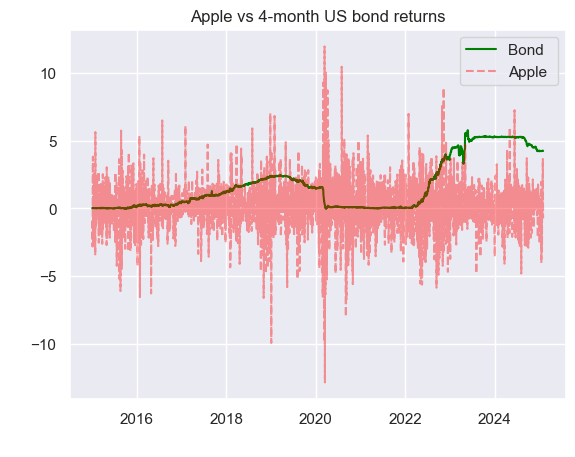

In [365]:
plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change_bond'], 
         label="Bond ", color='green', linestyle='solid')
plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change %_apple'], 
         label="Apple ", color='red', linestyle='dashed', alpha = 0.4)




plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Apple vs 4-month US bond returns")
plt.legend()
plt.grid(True)


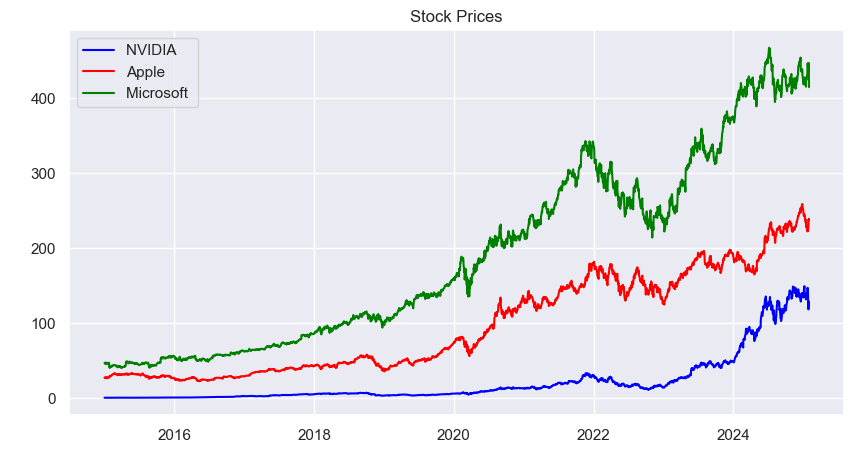

In [359]:
plt.figure(figsize=(10,5))


plt.plot(df_merged_cleaned.index, df_merged_cleaned['Price_nvd'], 
         label="NVIDIA ", color='blue', linestyle='solid')


plt.plot(df_merged_cleaned.index, df_merged_cleaned['Price_apple'], 
         label="Apple ", color='red', linestyle='solid')

plt.plot(df_merged_cleaned.index, df_merged_cleaned['Price_mic'], 
         label="Microsoft ", color='green', linestyle='solid')



plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Stock Prices")
plt.legend()
plt.grid(True)




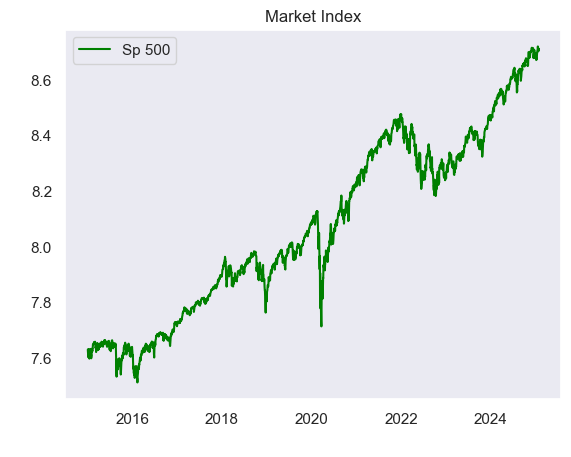

In [316]:

df_merged_cleaned = df_merged_cleaned.sort_values(by="Date")
df_merged_cleaned['Log_Price_sp_500'] = np.log(df_merged_cleaned['Price_sp_500'])

plt.plot(df_merged_cleaned.index, df_merged_cleaned['Log_Price_sp_500'], label="Sp 500", color='green', linestyle='solid')

plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Market Index")
plt.legend()
plt.grid(False)
#plt.plot(df_merged_cleaned.index, df_merged_cleaned['Log_Price_sp_500'], 
        # label="Sp 500", color='green', linestyle='solid')

In [218]:
import sys
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/var/folders/4v/k9cvf5896wzc9l712hb1qysh0000gn/T/ipykernel_29435/3304093355.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


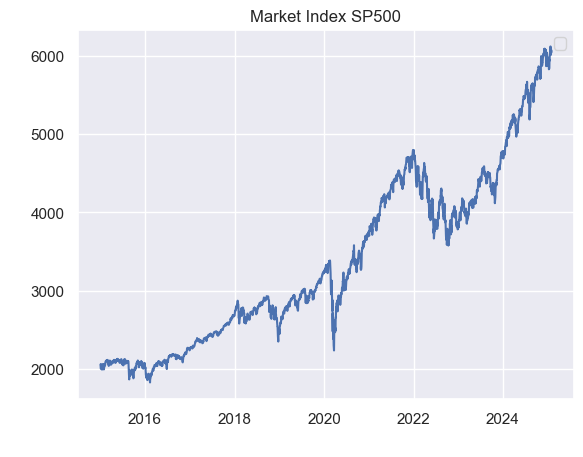

In [236]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.despine()
sns.lineplot(x=df_merged_cleaned.index, y='Price_sp_500',
             data=df_merged_cleaned)

plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Market Index SP500")
plt.legend()

,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond,Log_Price_sp_500
Date,,,,,,,,,,,,,,
2015-01-02,15.43,-0.58,26.48,-0.19,46.76,0.67,0.50,0.00,NaN,-0.03,27.33,-0.94,0.02,NaN
2015-01-05,15.11,-2.07,25.97,-1.93,46.33,-0.92,0.49,-2.00,NaN,-1.83,26.56,-2.82,0.02,NaN
2015-01-06,14.76,-2.32,25.33,-2.46,45.65,-1.47,0.48,-2.04,NaN,-0.89,26.57,0.04,0.02,NaN
2015-01-07,14.92,1.08,25.26,-0.28,46.23,1.27,0.48,0.00,NaN,1.16,26.94,1.39,0.02,NaN
2015-01-08,15.02,0.67,25.35,0.36,47.59,2.94,0.50,4.17,NaN,1.79,27.97,3.82,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,234.85,-0.24,200.21,1.13,444.06,-0.59,142.62,-3.12,NaN,-0.29,222.78,-0.39,4.26,NaN
2025-01-27,235.42,0.24,191.81,-4.20,434.56,-2.14,118.42,-16.97,NaN,-1.46,229.86,3.18,4.26,NaN
2025-01-28,238.15,1.16,195.30,1.82,447.20,2.91,128.99,8.93,NaN,0.92,238.26,3.65,4.27,NaN


In [63]:
df_nvd.loc[2245:2246]
df_nvd= df_nvd.drop(df_nvd.index[[2245, 2246]])


In [67]:
df_nvd = df_nvd.sort_values(by='Date')

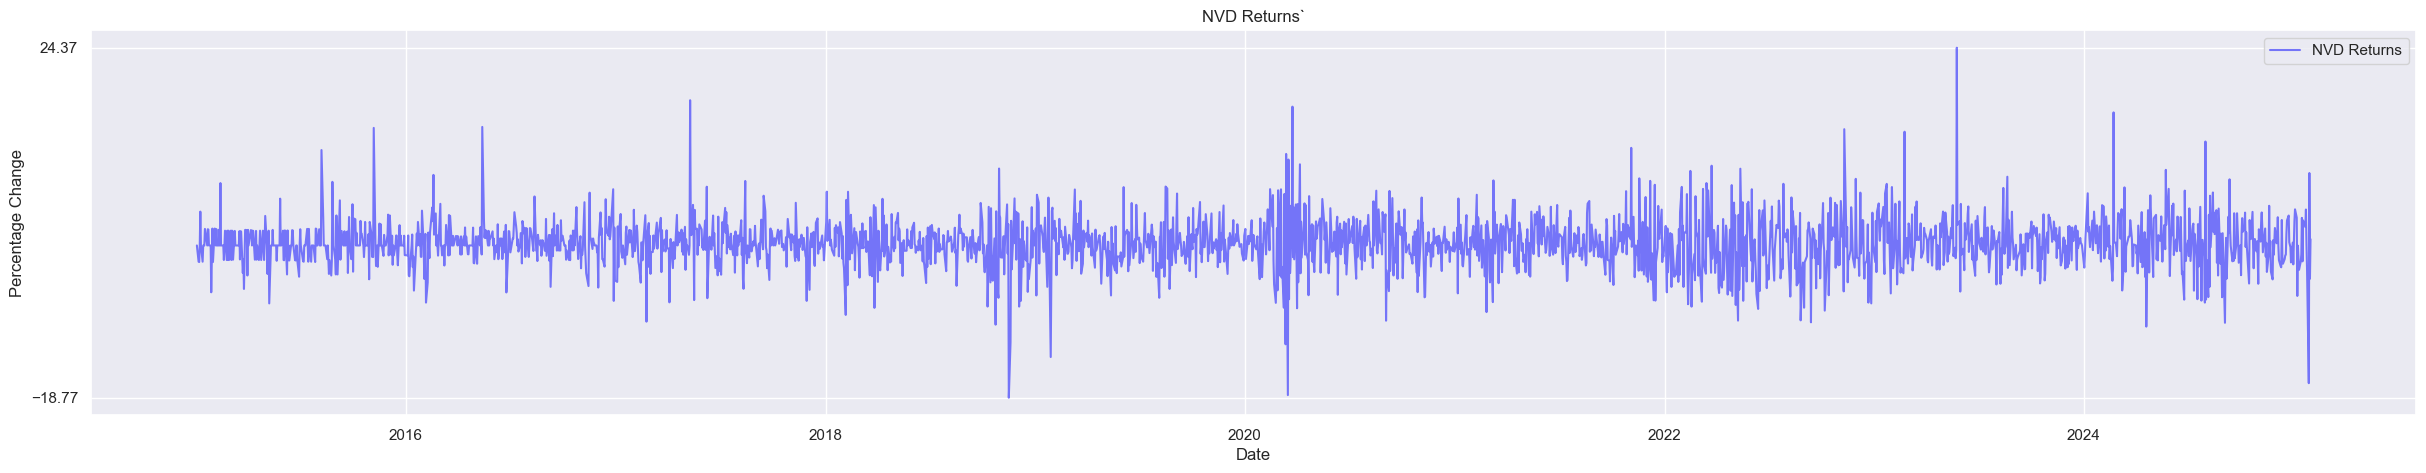

In [238]:

plt.figure(figsize=(30,5))

plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change %_nvd'], label="NVD Returns", color='blue', alpha = 0.5 )
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.title("NVD Returns`")
plt.yticks([min(df_merged_cleaned['Change %_nvd']), max(df_merged_cleaned['Change %_nvd'])])
plt.legend()
plt.grid(True)




In [ ]:
# (Pt - pt-1)/ pt-1

#moving average 
## T(t) = 1/m sum(k, j = -k) Y(t+j)     m = 2k +1

In [240]:
import numpy as np

In [242]:
df_merged_cleaned['Log price'] = np.log(df_merged_cleaned['Price_apple'])

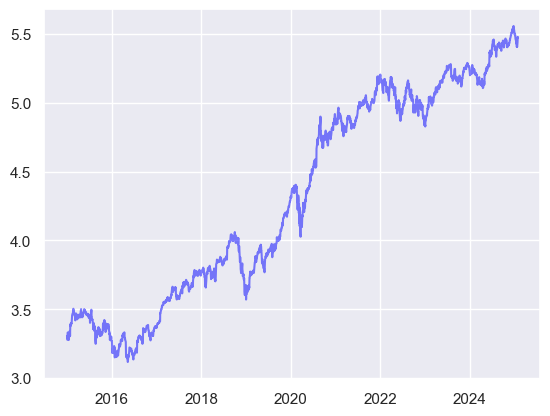

In [244]:
plt.plot(df_merged_cleaned.index, df_merged_cleaned['Log price'], label="Apple Log Prices", color='blue', alpha = 0.5 )

In [247]:
df_merged_cleaned['SMA_10_apple'] = df_merged_cleaned['Price_apple'].rolling(window=10).mean()  

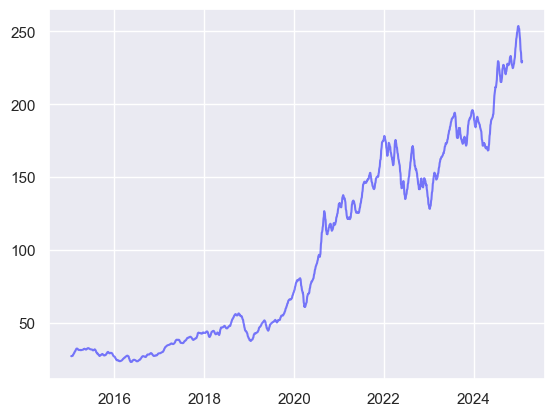

In [248]:
plt.plot(df_merged_cleaned.index, df_merged_cleaned['SMA_10_apple'], label='SMA_10_apple', color='blue', alpha = 0.5 )

In [249]:
from statsmodels.tsa.seasonal import STL

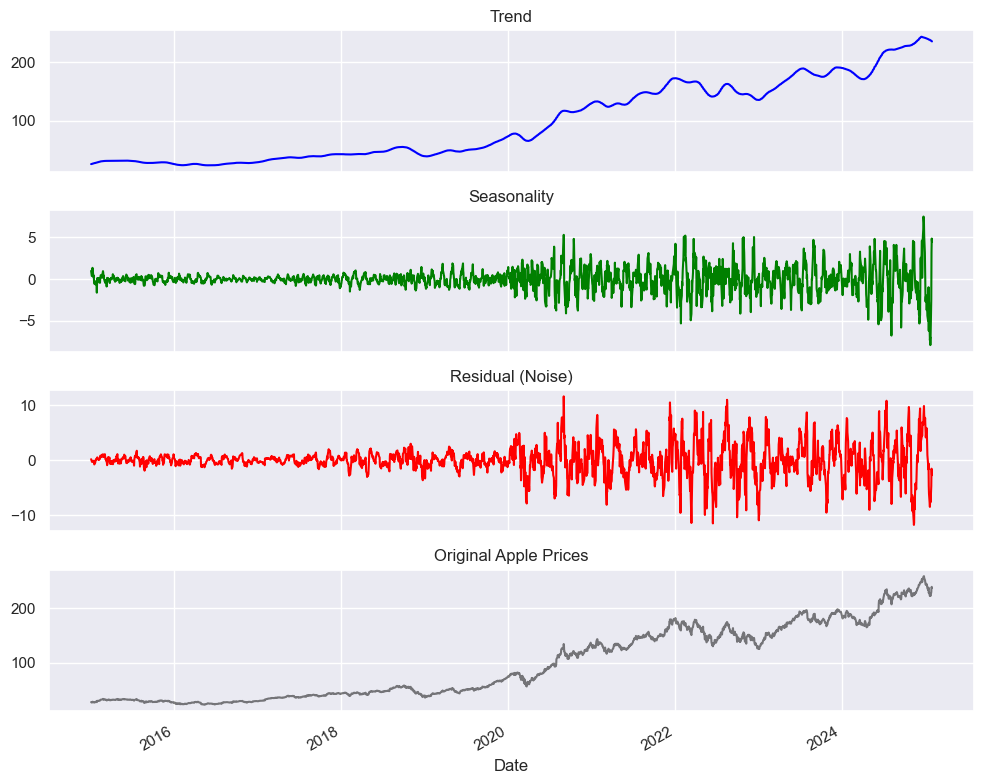

In [283]:

stl = STL(df_merged_cleaned['Price_apple'], period=30) 
result = stl.fit()
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df_merged_cleaned['Price_apple'].plot(ax=axes[3], title="Original Apple Prices", color='black', alpha=0.5)
result.trend.plot(ax=axes[0], title="Trend", color='blue')
result.seasonal.plot(ax=axes[1], title="Seasonality", color='green')
result.resid.plot(ax=axes[2], title="Residual (Noise)", color='red')

plt.tight_layout()
plt.show()

In [284]:
var_resid = np.var(result.resid.dropna())   # Variance of residuals
var_trend = np.var(result.trend.dropna())   # Variance of trend
var_seasonal = np.var(result.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.2f}")
print(f"Strength of Seasonality: {F_seasonality:.2f}")

Strength of Trend: 1.00
Strength of Seasonality: 0.20


In [444]:
df_merged_cleaned.index.to_series().diff().value_counts()  # Should show mostly one value

Date
1 days    1962
3 days     439
4 days      87
2 days      27
Name: count, dtype: int64


In [423]:

full_date_range = pd.date_range(start=df_merged_cleaned.index.min(), end=df_merged_cleaned.index.max(), freq='D')

# Reindex to include all missing dates
df_merged_ts = df_merged_cleaned.reindex(full_date_range)
df_merged_ts = df_merged_ts .interpolate(method='linear')  # Fill missing values

In [488]:
print(df_merged_ts.index.to_series().diff().value_counts())

1 days    3681
Name: count, dtype: int64


In [491]:
print(df_merged_ts.isnull().sum())

Price_am           0
Change %_am        0
Price_alpha        0
Change %_alpha     0
Price_mic          0
Change %_mic       0
Price_nvd          0
Change %_nvd       0
Price_sp_500       0
Change %_sp_500    0
Price_apple        0
Change %_apple     0
Change_bond        0
outlier_apple      0
dtype: int64


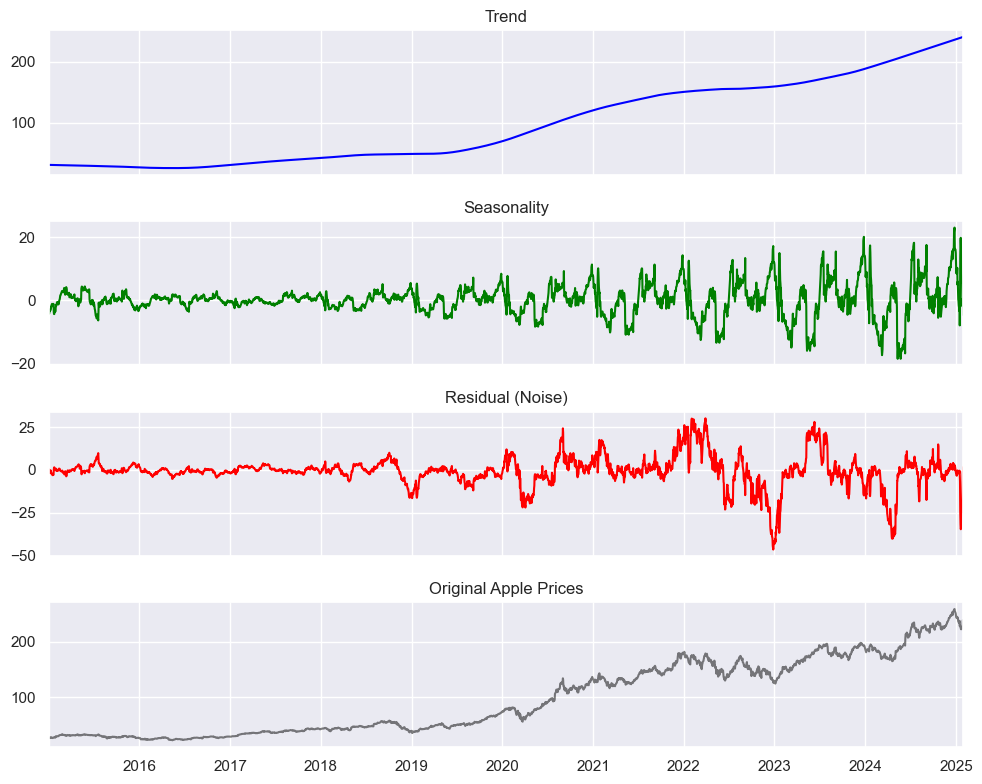

In [446]:
stl = STL(df_merged_ts['Price_apple'], period= 365, seasonal=365, robust=True) 
result = stl.fit()
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df_merged_ts['Price_apple'].plot(ax=axes[3], title="Original Apple Prices", color='black', alpha=0.5)
result.trend.plot(ax=axes[0], title="Trend", color='blue')
result.seasonal.plot(ax=axes[1], title="Seasonality", color='green')
result.resid.plot(ax=axes[2], title="Residual (Noise)", color='red')

plt.tight_layout()
plt.show()

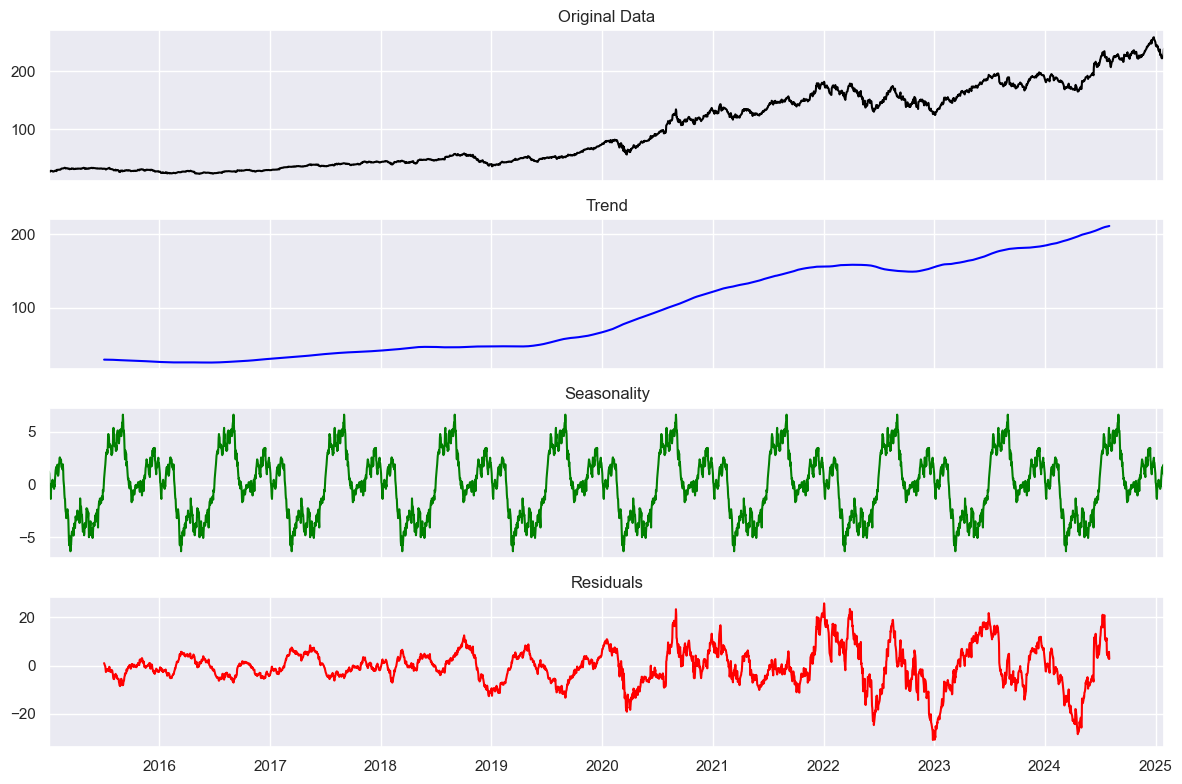

In [471]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_merged_ts["Price_apple"], model="additive", period=365)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Plot original data
df_merged_ts["Price_apple"].plot(ax=axes[0], title="Original Data", color="black")
# Plot trend
decomposed.trend.plot(ax=axes[1], title="Trend", color="blue")
# Plot seasonality
decomposed.seasonal.plot(ax=axes[2], title="Seasonality", color="green")
# Plot residuals
decomposed.resid.plot(ax=axes[3], title="Residuals", color="red")

plt.tight_layout()
plt.show()

In [472]:
var_resid = np.var(decomposed.resid.dropna())   # Variance of residuals
var_trend = np.var(decomposed.trend.dropna())   # Variance of trend
var_seasonal = np.var(decomposed.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.4f}")
print(f"Strength of Seasonality: {F_seasonality:.4f}")

Strength of Trend: 0.9825
Strength of Seasonality: 0.1191


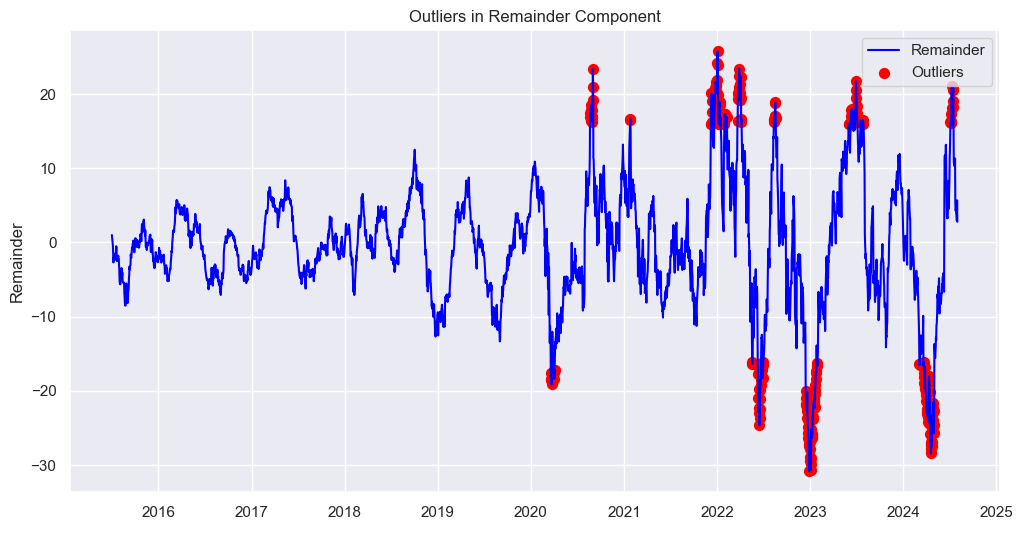

In [473]:
remainder_std = np.std(decomposed.resid.dropna(), ddof=1)

# Identify outliers 
outliers_idx = np.abs(decomposed.resid) > 2 * remainder_std

# Plot the remainder component with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_merged_ts.index, decomposed.resid, color="blue", label="Remainder")

# Overlay outliers in red using the indices
plt.scatter(df_merged_ts.index[outliers_idx], decomposed.resid[outliers_idx], color="red", label="Outliers", s=50)

# Labels and formatting
plt.title("Outliers in Remainder Component")
plt.xlabel(" ")
plt.ylabel("Remainder")
plt.legend()
plt.grid(True)
plt.show()

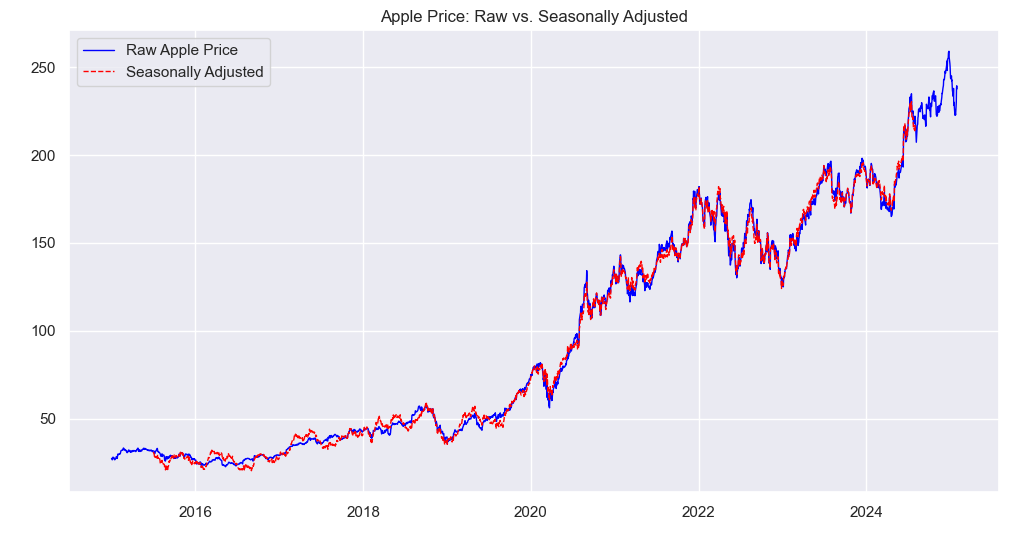

In [475]:
# Compute the seasonally adjusted Apple price (Trend + Residuals)
apple_adjusted = decomposed.trend + decomposed.resid

# Plot the raw vs. seasonally adjusted Apple price
plt.figure(figsize=(12, 6))
plt.plot(df_merged_ts.index, df_merged_ts["Price_apple"], label="Raw Apple Price", color="blue", linewidth=1)
plt.plot(df_merged_ts.index, apple_adjusted, label="Seasonally Adjusted", color="red", linewidth=1, linestyle="dashed")

# Labels and formatting
plt.title("Apple Price: Raw vs. Seasonally Adjusted")
plt.xlabel(" ")
plt.ylabel(" ")
plt.legend()
plt.grid(True)

plt.show()

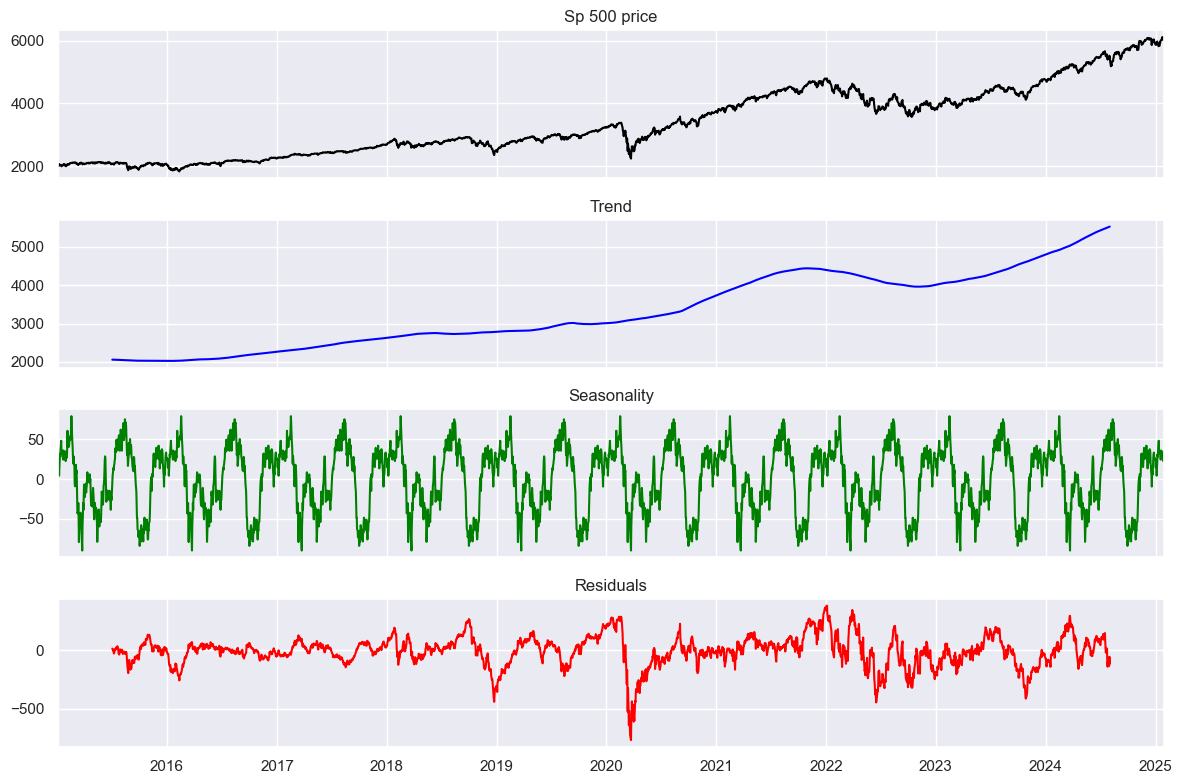

In [465]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_merged_ts["Price_sp_500"], model="additive", period=365)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Plot original data
df_merged_ts["Price_sp_500"].plot(ax=axes[0], title="Sp 500 price", color="black")
# Plot trend
decomposed.trend.plot(ax=axes[1], title="Trend", color="blue")
# Plot seasonality
decomposed.seasonal.plot(ax=axes[2], title="Seasonality", color="green")
# Plot residuals
decomposed.resid.plot(ax=axes[3], title="Residuals", color="red")

plt.tight_layout()
plt.show()

In [466]:
var_resid = np.var(decomposed.resid.dropna())   # Variance of residuals
var_trend = np.var(decomposed.trend.dropna())   # Variance of trend
var_seasonal = np.var(decomposed.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.4f}")
print(f"Strength of Seasonality: {F_seasonality:.4f}")

Strength of Trend: 0.9818
Strength of Seasonality: 0.0886


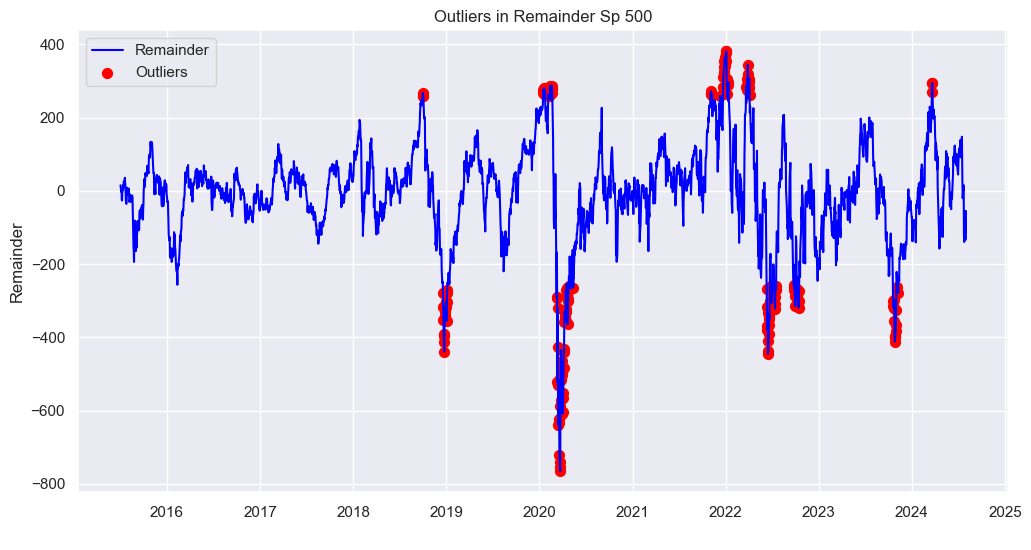

In [467]:
remainder_std = np.std(decomposed.resid.dropna(), ddof=1)

# Identify outliers 
outliers_idx = np.abs(decomposed.resid) > 2 * remainder_std

# Plot the remainder component with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_merged_ts.index, decomposed.resid, color="blue", label="Remainder")

# Overlay outliers in red using the indices
plt.scatter(df_merged_ts.index[outliers_idx], decomposed.resid[outliers_idx], color="red", label="Outliers", s=50)

# Labels and formatting
plt.title("Outliers in Remainder Sp 500")
plt.xlabel(" ")
plt.ylabel("Remainder")
plt.legend()
plt.grid(True)
plt.show()

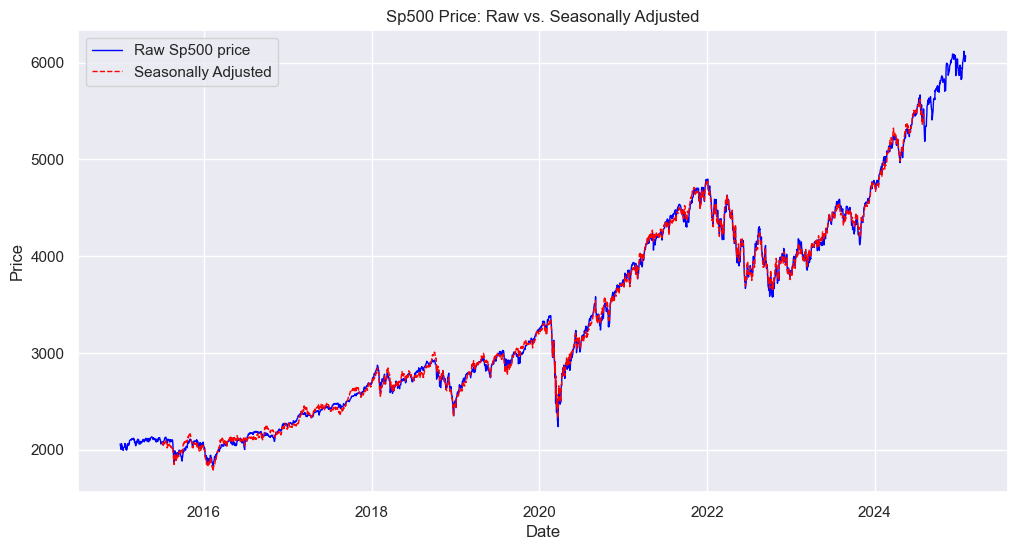

In [470]:
# Compute the seasonally adjusted Apple price (Trend + Residuals)
sp500_adjusted = decomposed.trend + decomposed.resid

# Plot the raw vs. seasonally adjusted Apple price
plt.figure(figsize=(12, 6))
plt.plot(df_merged_ts.index, df_merged_ts["Price_sp_500"], label="Raw Sp500 price", color="blue", linewidth=1)
plt.plot(df_merged_ts.index, sp500_adjusted, label="Seasonally Adjusted", color="red", linewidth=1, linestyle="dashed")

# Labels and formatting
plt.title("Sp500 Price: Raw vs. Seasonally Adjusted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

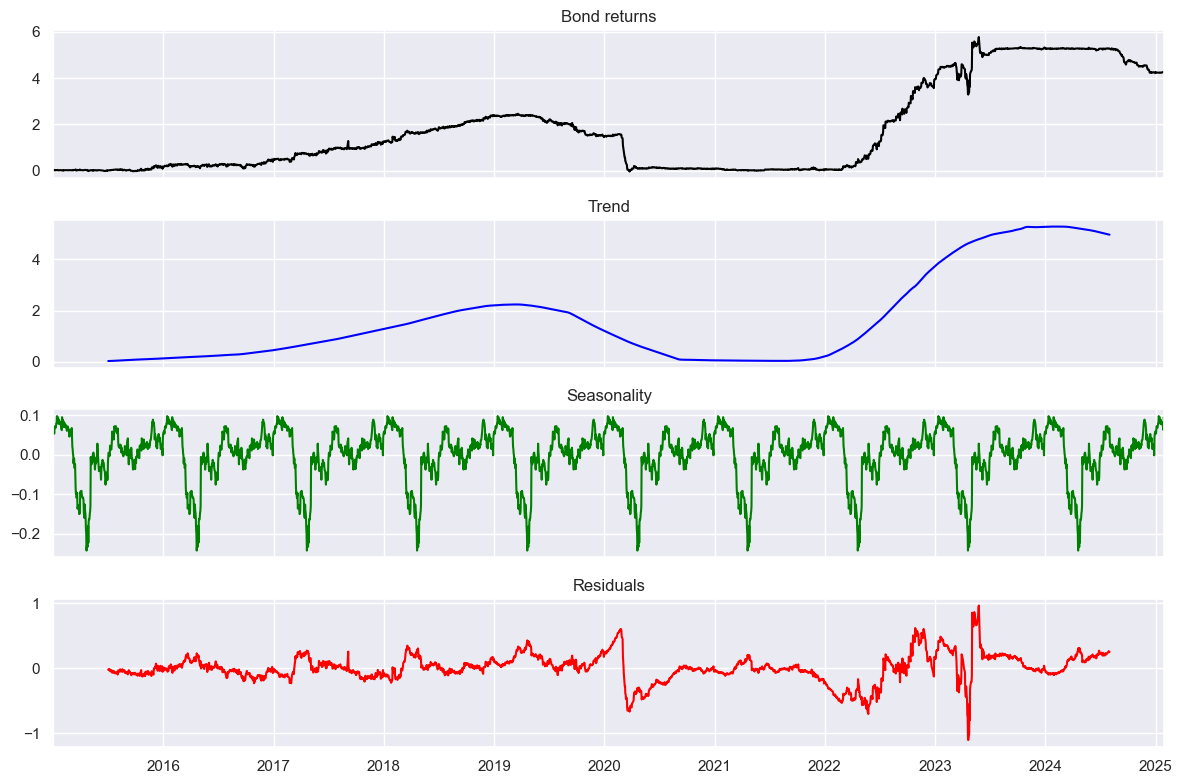

In [461]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_merged_ts["Change_bond"], model="additive", period=365)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Plot original data
df_merged_ts["Change_bond"].plot(ax=axes[0], title="Bond returns", color="black")
# Plot trend
decomposed.trend.plot(ax=axes[1], title="Trend", color="blue")
# Plot seasonality
decomposed.seasonal.plot(ax=axes[2], title="Seasonality", color="green")
# Plot residuals
decomposed.resid.plot(ax=axes[3], title="Residuals", color="red")

plt.tight_layout()
plt.show()

In [455]:
var_resid = np.var(decomposed.resid.dropna())   # Variance of residuals
var_trend = np.var(decomposed.trend.dropna())   # Variance of trend
var_seasonal = np.var(decomposed.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.4f}")
print(f"Strength of Seasonality: {F_seasonality:.4f}")

Strength of Trend: 0.9851
Strength of Seasonality: 0.0967


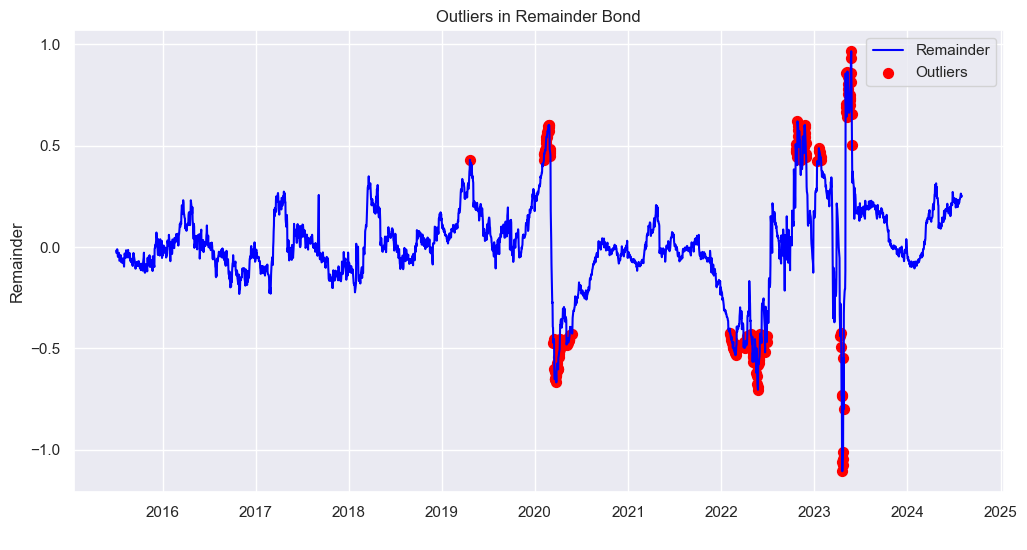

In [457]:
remainder_std = np.std(decomposed.resid.dropna(), ddof=1)

# Identify outliers 
outliers_idx = np.abs(decomposed.resid) > 2 * remainder_std

# Plot the remainder component with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_merged_ts.index, decomposed.resid, color="blue", label="Remainder")

# Overlay outliers in red using the indices
plt.scatter(df_merged_ts.index[outliers_idx], decomposed.resid[outliers_idx], color="red", label="Outliers", s=50)

# Labels and formatting
plt.title("Outliers in Remainder Bond")
plt.xlabel(" ")
plt.ylabel("Remainder")
plt.legend()
plt.grid(True)
plt.show()

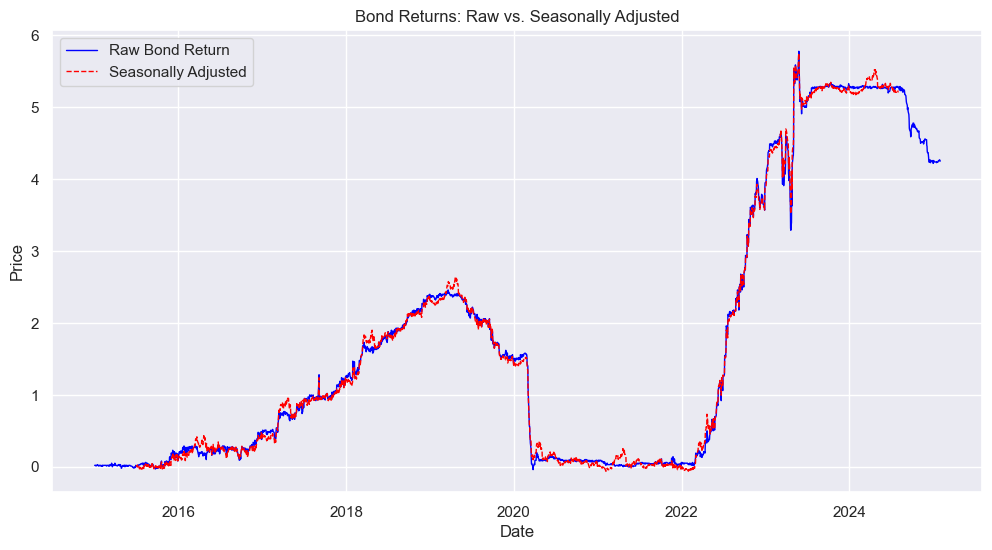

In [464]:
# Compute the seasonally adjusted Apple price (Trend + Residuals)
bond_adjusted = decomposed.trend + decomposed.resid

# Plot the raw vs. seasonally adjusted Apple price
plt.figure(figsize=(12, 6))
plt.plot(df_merged_ts.index, df_merged_ts["Change_bond"], label="Raw Bond Return", color="blue", linewidth=1)
plt.plot(df_merged_ts.index, bond_adjusted, label="Seasonally Adjusted", color="red", linewidth=1, linestyle="dashed")

# Labels and formatting
plt.title("Bond Returns: Raw vs. Seasonally Adjusted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

In [476]:
df_weekly = df_merged_ts.resample('W').mean()  #weekly average 

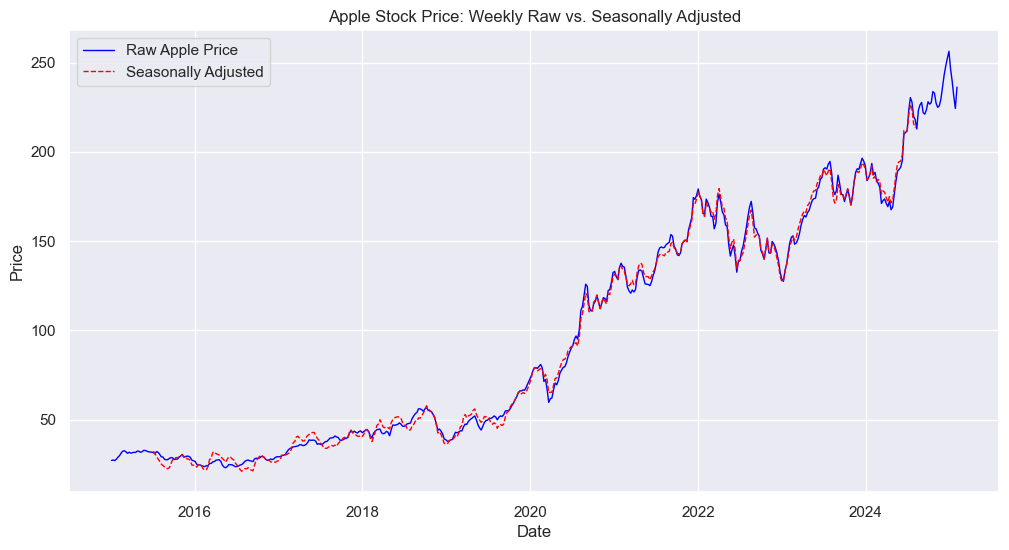

In [495]:

decomposed_weekly = seasonal_decompose(df_weekly["Price_apple"], model="additive", period=52)
# Compute the seasonally adjusted Apple price (Trend + Residuals)
apple_adjusted_weekly = decomposed_weekly.trend + decomposed_weekly.resid
# Plot the raw vs. seasonally adjusted weekly Apple price
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly["Price_apple"], label="Raw Apple Price", color="blue", linewidth=1)
plt.plot(df_weekly.index, apple_adjusted_weekly, label="Seasonally Adjusted", color="red", linewidth=1, linestyle="dashed")
# Labels and formatting
plt.title("Apple Stock Price: Weekly Raw vs. Seasonally Adjusted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

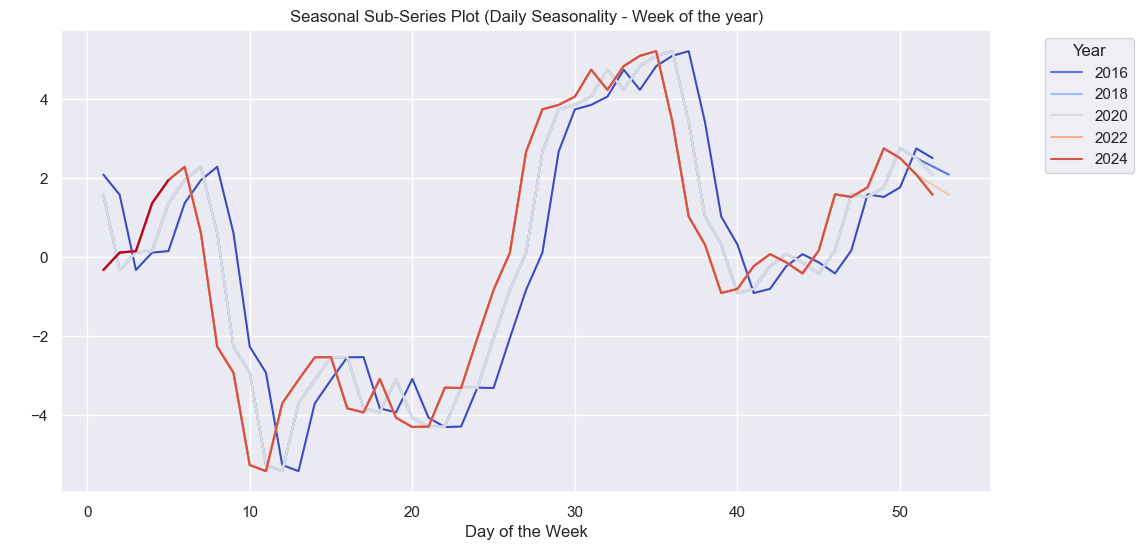

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Seasonal Component by Day of the Week (Without Adding Columns)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_weekly,
    x=df_weekly.index.isocalendar().week,
    y=decomposed_weekly.seasonal,
    hue=df_weekly.index.year,
    palette="coolwarm",
    alpha=1
)
plt.title("Seasonal Sub-Series Plot (Daily Seasonality - Week of the year)")
plt.xlabel("Day of the Week")
plt.ylabel(" ")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()



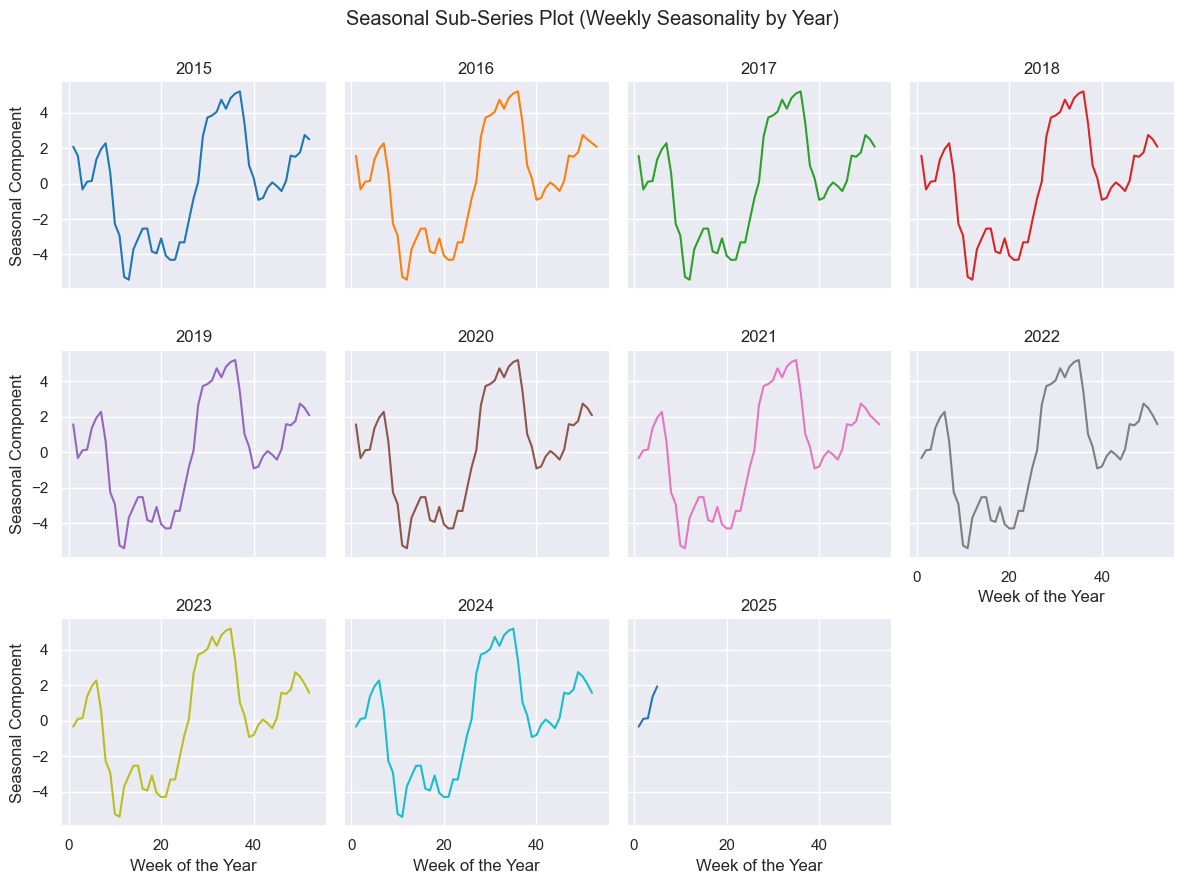

In [500]:
df_plot = df_weekly.copy()
df_plot["week"] = df_plot.index.isocalendar().week  # Extract week number
df_plot["year"] = df_plot.index.year  # Extract year
df_plot["seasonal"] = decomposed_weekly.seasonal  

# Create FacetGrid to separate by year
g = sns.FacetGrid(df_plot, col="year", col_wrap=4, height=3, sharey=True,hue="year", palette="tab10")
g.map(sns.lineplot, "week", "seasonal")

# Formatting
g.set_titles(col_template="{col_name}")  # Show years as titles
g.set_axis_labels("Week of the Year", "Seasonal Component")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Seasonal Sub-Series Plot (Weekly Seasonality by Year)")  # Add title

plt.show()

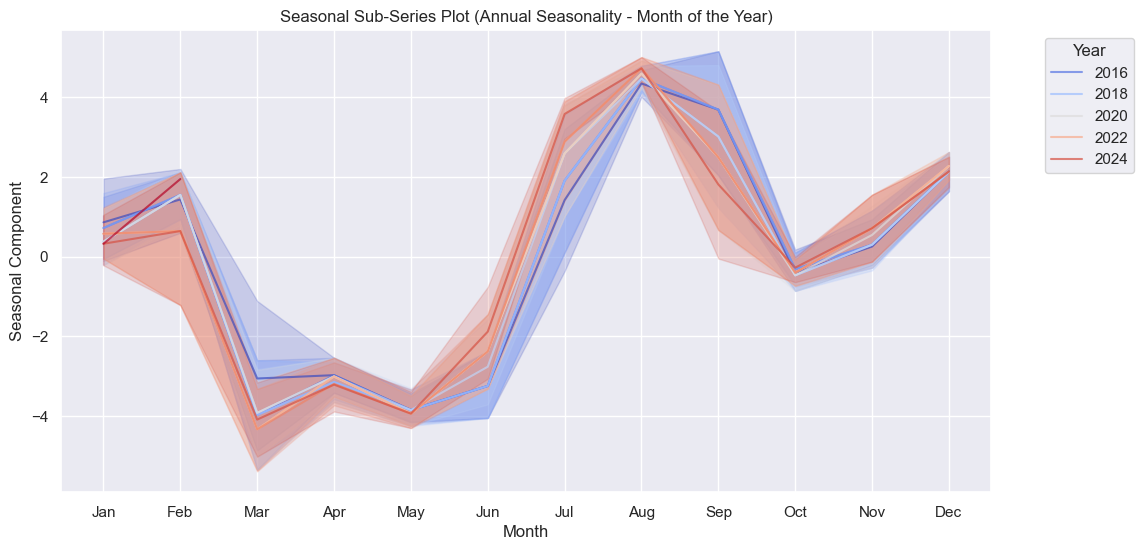

In [504]:
# Plot Seasonal Component by Month of the Year (Without Adding Columns)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_weekly,
    x=df_weekly.index.month.map(lambda x: ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"][x - 1]),
    y=decomposed_weekly.seasonal,
    hue=df_weekly.index.year,
    palette="coolwarm",
    alpha=0.7
)
plt.title("Seasonal Sub-Series Plot (Annual Seasonality - Month of the Year)")
plt.xlabel("Month")
plt.ylabel("Seasonal Component")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()
